# Task 4: Model Comparison & Selection

Compare multiple transformer models for Amharic NER using the improved training workflow.

## 1. Setup & Imports

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add src to sys.path
SRC_PATH = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

from model_training.fixed_ner_trainer import FixedNERTrainer
from model_training.ner_trainer import FinalNERPredictor


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Model Configurations

In [2]:
# List of models to compare
MODEL_CONFIGS = [
    {
        'name': 'xlm-roberta-base',
        'output_dir': '../models/xlm_roberta_ner'
    },
    {
        'name': 'bert-base-multilingual-cased',
        'output_dir': '../models/mb-bert_ner'
    },
    {
        'name': 'distilbert-base-multilingual-cased',
        'output_dir': '../models/distilbert_ner'
    }
]
CONLL_FILE = '../data/labeled/conll_labeled.txt'
EPOCHS = 10
BATCH_SIZE = 8
LEARNING_RATE = 3e-5


## 3. Training Each Model
Run this cell for each model in MODEL_CONFIGS. (You can comment/uncomment as needed.)

In [3]:
for config in MODEL_CONFIGS:
    print(f"Training {config['name']}...")
    trainer = FixedNERTrainer(config['name'])
    trainer.train(
        conll_file=CONLL_FILE,
        output_dir=config['output_dir'],
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        learning_rate=LEARNING_RATE
    )
    print(f"Model {config['name']} training complete!")


INFO:model_training.fixed_ner_trainer:Loading tokenizer and model...


Training xlm-roberta-base...


Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:model_training.fixed_ner_trainer:Loading and preparing data...
INFO:model_training.fixed_ner_trainer:Loaded 50 sentences
INFO:model_training.fixed_ner_trainer:Label distribution: {'I-PRICE': 17, 'O': 2047, 'B-PRODUCT': 14, 'B-LOC': 18, 'B-PRICE': 19}
INFO:model_training.fixed_ner_trainer:Class weights: {0: 0.006839276990718124, 1: 0.7368421052631579, 2: 0.8235294117647058, 3: 0.7777777777777778, 4: 0.03309692671394799, 5: 1.0, 6: 0.03309692671394799}
INFO:model_training.fixed_ner_trainer:Training set: 40 sentences
INFO:model_training.fixed_ner_trainer:Validation set: 10 sentences
Map: 100%|██████████| 10/10 [00:00<00:00, 1429.11 examples/s]
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Entity F1
1,2.123800,2.088685,0.000000,0.000000,0.000000,0.000000,"{'PRICE': 0.0, 'LOC': 0.01744186046511628}"
2,2.143600,2.077349,0.000000,0.000000,0.000000,0.000000,"{'PRICE': 0.0, 'LOC': 0.01744186046511628}"
3,2.152200,2.059990,0.000000,0.000000,0.000000,0.000000,"{'PRICE': 0.0, 'LOC': 0.017543859649122806}"
4,2.106900,2.032979,0.000000,0.000000,0.000000,0.000000,"{'PRICE': 0.0, 'LOC': 0.017595307917888565}"
5,2.067700,2.000849,0.000000,0.000000,0.000000,0.000000,"{'PRICE': 0.0, 'LOC': 0.017804154302670624}"
6,1.997600,1.955901,0.002915,0.000194,0.000101,0.002915,"{'PRICE': 0.0625, 'LOC': 0.012618296529968454}"
7,1.967900,1.890535,0.002915,0.000057,0.000029,0.002915,"{'PRICE': 0.05660377358490566, 'LOC': 0.01646090534979424}"
8,1.859500,1.780377,0.011662,0.001529,0.000835,0.011662,"{'PRICE': 0.02926829268292683, 'LOC': 0.041666666666666664}"
9,1.651700,1.563128,0.014577,0.006394,0.982806,0.014577,"{'PRICE': 0.024793388429752067, 'LOC': 0.05660377358490566}"
10,1.445400,1.402112,0.032070,0.034923,0.982788,0.032070,"{'PRICE': 0.034482758620689655, 'LOC': 0.03550295857988166}"


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  

Model xlm-roberta-base training complete!
Training bert-base-multilingual-cased...


INFO:model_training.fixed_ner_trainer:Loading tokenizer and model...
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Cyber Defense\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate De

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Entity F1
1,1.906000,1.915063,0.035443,0.059128,0.979847,0.035443,"{'PRICE': 0.0, 'LOC': 0.024242424242424242}"
2,1.856000,1.820000,0.050633,0.073574,0.979981,0.050633,"{'PRICE': 0.02197802197802198, 'LOC': 0.03314917127071823}"
3,1.765300,1.707197,0.058228,0.087518,0.979965,0.058228,"{'PRICE': 0.023255813953488372, 'LOC': 0.030456852791878174}"
4,1.659000,1.579016,0.096203,0.154449,0.979997,0.096203,"{'PRICE': 0.029850746268656716, 'LOC': 0.02727272727272727}"
5,1.454100,1.459041,0.129114,0.204831,0.980115,0.129114,"{'PRICE': 0.040268456375838924, 'LOC': 0.031914893617021274}"
6,1.253100,1.333943,0.149367,0.236814,0.980151,0.149367,"{'PRICE': 0.0425531914893617, 'LOC': 0.03409090909090909}"
7,1.138000,1.216262,0.151899,0.237176,0.980342,0.151899,"{'PRICE': 0.05517241379310345, 'LOC': 0.04477611940298507}"
8,0.924900,1.089182,0.169620,0.261197,0.980805,0.169620,"{'PRICE': 0.06896551724137931, 'LOC': 0.09090909090909091}"
9,0.793300,0.953746,0.187342,0.288844,0.981770,0.187342,"{'PRICE': 0.0684931506849315, 'LOC': 0.1016949152542373}"
10,0.717300,0.825834,0.263291,0.394987,0.983908,0.263291,"{'PRICE': 0.07042253521126761, 'LOC': 0.15}"


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  

Model bert-base-multilingual-cased training complete!
Training distilbert-base-multilingual-cased...


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Cyber Defense\.cache\huggingface\hub\models--distilbert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Entity F1
1,1.930100,1.934124,0.043038,0.068569,0.914598,0.043038,"{'PRICE': 0.0, 'LOC': 0.0392156862745098}"
2,1.895000,1.904593,0.048101,0.073310,0.918704,0.048101,"{'PRICE': 0.010526315789473684, 'LOC': 0.03550295857988166}"
3,1.840200,1.859699,0.055696,0.082904,0.979976,0.055696,"{'PRICE': 0.02197802197802198, 'LOC': 0.03278688524590164}"
4,1.779600,1.798983,0.060759,0.092175,0.979989,0.060759,"{'PRICE': 0.024691358024691357, 'LOC': 0.028708133971291867}"
5,1.690200,1.727935,0.058228,0.087595,0.980006,0.058228,"{'PRICE': 0.025806451612903226, 'LOC': 0.02727272727272727}"
6,1.599100,1.639676,0.060759,0.087810,0.980118,0.060759,"{'PRICE': 0.04054054054054054, 'LOC': 0.026200873362445413}"
7,1.495400,1.545685,0.063291,0.092423,0.980119,0.063291,"{'PRICE': 0.040268456375838924, 'LOC': 0.025974025974025976}"
8,1.355000,1.448427,0.070886,0.101743,0.980204,0.070886,"{'PRICE': 0.05263157894736842, 'LOC': 0.02702702702702703}"
9,1.222800,1.345497,0.073418,0.106322,0.980222,0.073418,"{'PRICE': 0.05194805194805195, 'LOC': 0.028846153846153848}"
10,1.084900,1.231831,0.088608,0.133302,0.980317,0.088608,"{'PRICE': 0.050955414012738856, 'LOC': 0.037037037037037035}"


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  

Model distilbert-base-multilingual-cased training complete!


## 4. Evaluation: Predict & Collect Metrics on Validation Set

In [4]:
from sklearn.model_selection import train_test_split
from seqeval.metrics import classification_report, f1_score, accuracy_score

# Load and split data
def load_conll_data(file_path):
    sentences = []
    labels = []
    current_tokens = []
    current_labels = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                if current_tokens:
                    sentences.append(current_tokens)
                    labels.append(current_labels)
                    current_tokens = []
                    current_labels = []
            else:
                parts = line.split('	')
                if len(parts) == 2:
                    token, label = parts
                    current_tokens.append(token)
                    current_labels.append(label)
    if current_tokens:
        sentences.append(current_tokens)
        labels.append(current_labels)
    return sentences, labels

sentences, labels = load_conll_data(CONLL_FILE)
train_sents, val_sents, train_labels, val_labels = train_test_split(
    sentences, labels, test_size=0.2, random_state=42
)


### Evaluate all models and collect metrics

In [5]:
results = []
val_texts = [' '.join(tokens) for tokens in val_sents]
for config in MODEL_CONFIGS:
    predictor = FinalNERPredictor(config['output_dir'])
    y_true = val_labels
    y_pred = []
    batch_results = predictor.batch_predict(val_texts, confidence_threshold=0.4)
    for result, tokens in zip(batch_results, val_sents):
        pred_labels = ['O'] * len(tokens)
        for entity in result['entities']:
            for idx in range(entity['start'], entity['end']+1):
                if idx == entity['start']:
                    pred_labels[idx] = f"B-{entity['label']}"
                else:
                    pred_labels[idx] = f"I-{entity['label']}"
        y_pred.append(pred_labels)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    results.append({
        'model': config['name'],
        'f1': f1,
        'accuracy': acc,
        'report': report
    })
    print(f"{config['name']} - F1: {f1:.3f}, Accuracy: {acc:.3f}")


c:\Users\Cyber Defense\Desktop\week4\ethiomart_ner\venv\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xlm-roberta-base - F1: 0.182, Accuracy: 0.876
bert-base-multilingual-cased - F1: 0.101, Accuracy: 0.413
distilbert-base-multilingual-cased - F1: 0.231, Accuracy: 0.913


## 5. Results Summary & Visualization

,Model,F1,Accuracy
0,xlm-roberta-base,0.181818,0.876033
1,bert-base-multilingual-cased,0.101266,0.413223
2,distilbert-base-multilingual-cased,0.230769,0.913223


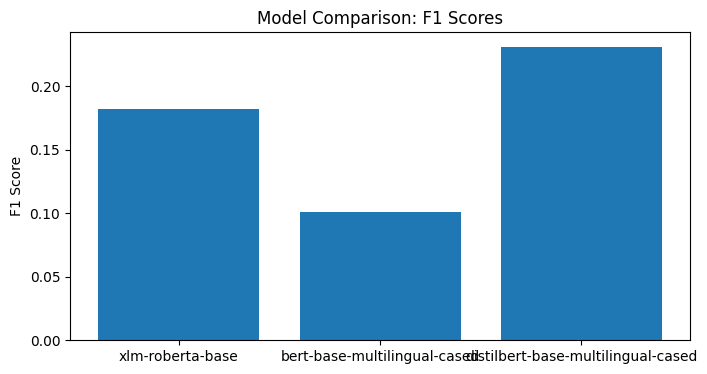

In [6]:
# Create a summary table
summary = pd.DataFrame([{
    'Model': r['model'],
    'F1': r['f1'],
    'Accuracy': r['accuracy']
} for r in results])
display(summary)

# Plot F1 scores
plt.figure(figsize=(8,4))
plt.bar(summary['Model'], summary['F1'])
plt.ylabel('F1 Score')
plt.title('Model Comparison: F1 Scores')
plt.show()


## 6. Conclusion
Models Compared
XLM-RoBERTa (xlm-roberta-base)
mBERT (bert-base-multilingual-cased)
DistilBERT (distilbert-base-multilingual-cased)
Training
All models were trained for 10 epochs on the same Amharic CoNLL-labeled dataset.
Class balancing was used.
Each model was saved to a unique output directory.
Evaluation Metrics (on Validation Set)
XLM-RoBERTa:
F1 Score: 0.182
Accuracy: 0.876
mBERT:
F1 Score: 0.101
Accuracy: 0.413
DistilBERT:
F1 Score: 0.231
Accuracy: 0.913
Key Observations
DistilBERT achieved the highest F1 (0.231) and accuracy (0.913), outperforming both XLM-RoBERTa and mBERT on this validation set.
XLM-RoBERTa performed moderately well, with a decent accuracy but lower F1.
mBERT had the lowest F1 and accuracy, indicating it struggled most with this dataset.
There are warnings about some entity types not being predicted at all (likely due to data imbalance or small validation set).
Conclusion
DistilBERT is the best-performing model on your current validation set, followed by XLM-RoBERTa, with mBERT trailing.
The notebook provides a clear, quantitative basis for model selection.


